# Reading Simulation Data 

Below is a Python notebook that demonstrates how to read simulation data from a file. We pull data fropm a given folder which has subfolders for each simulation. They will be grouped into a dictionary for easy access.

The data used in this notebook is based on 4 ECsim runs Harris sheet reconnection with varied guide fields. For details see:

Laperre, B.; Amaya, J.; Jamal, S.; Lapenta, G. Identification of High Order Closure Terms from Fully Kinetic Simulations Using Machine Learning. [Physics of Plasmas 2022, 29 (3), 032706.](https://doi.org/10.1063/5.0066397)

In [8]:
import matplotlib.pyplot as plt
import sys
sys.path.append('../')
import src.read_pic as rp
import os

# Fields to read.
fields_to_read={"B":True,"B_ext":True,"divB":True,"E":True,"E_ext":True,"rho":True,"J":True,
                "P":True,"PI":True,"Heat_flux":True,"N":True,"Qrem":True, "EF":True}
# Path of the folder containing the .h5 files to read.
files_path="/volume1/scratch/share_dir/nn/data/raw_data/" # "/users/cpa/francesc/share_dir/SW/data_small/" #"/users/cpa/francesc/share_dir/jincai/dat_FF2D07e/" #="/users/cpa/francesc/share_dir/nn/data/raw_data/"
# this folder should contain a list of experiments, each of them containing the .h5 files
experiments = [f.name for f in os.scandir(files_path) if f.is_dir()]
print(f"{experiments = }")
# Below we choose only initial time step just to view spatial distribution of the fields
choose_times = [0] # if list specific timeshots are chosen, i.e. [0, 1, 5], otherwise choose_times = None
#choose_species = ['e1',None,'e2',None] # the ones which have directive None will be ignored, the ones which have same name will be summed over


experiments = ['high_res_bg0', 'high_res_bg3', 'high_res_hbg', 'high_res_2']


The code bellow extracts a particular time slice and particular spatial slice from the data, which is useful for analyzing specific regions or time points in the simulation. And reducing memory usage.

In [4]:
data, X, Y, qom = rp.get_experiments(experiments, files_path, fields_to_read, choose_species=['e1','i1','e2','i2'], choose_times=[3],choose_x=[0,384], choose_y=[179,333], verbose=False)

INFO:src.read_pic: reading /volume1/scratch/share_dir/nn/data/raw_data//high_res_bg0/SimulationData.txt
INFO:src.read_pic:Lx = 30.0, Ly = 40.0, nxc = 768, nyc = 1024
INFO:src.read_pic: reading /volume1/scratch/share_dir/nn/data/raw_data//high_res_bg3/SimulationData.txt
INFO:src.read_pic:Lx = 30.0, Ly = 40.0, nxc = 768, nyc = 1024
INFO:src.read_pic: reading /volume1/scratch/share_dir/nn/data/raw_data//high_res_hbg/SimulationData.txt
INFO:src.read_pic:Lx = 30.0, Ly = 40.0, nxc = 768, nyc = 1024
INFO:src.read_pic: reading /volume1/scratch/share_dir/nn/data/raw_data//high_res_2/SimulationData.txt
INFO:src.read_pic:Lx = 30.0, Ly = 40.0, nxc = 768, nyc = 1024


The charge per mass ratio is:

In [10]:

print(f"{qom = }")

qom = [-256.0, 1.0, -256.0, 1.0]


There are four experiments for each guide field:

In [7]:
data.keys()

dict_keys(['high_res_bg0', 'high_res_bg3', 'high_res_hbg', 'high_res_2'])

If we look in a specific experiment we can see the data is stored with fields as keys:

In [11]:
data['high_res_2'].keys()

dict_keys(['Bx', 'By', 'Bz', 'Bmagn', 'Bx_ext', 'By_ext', 'Bz_ext', 'Ex', 'Ey', 'Ez', 'Emagn', 'divB', 'rho', 'N', 'Qrem', 'Jx', 'Jy', 'Jz', 'Vx', 'Vy', 'Vz', 'Jmagn', 'Jtotx', 'Jtoty', 'Jtotz', 'Vmagn', 'PIxx', 'Pxx', 'PIxy', 'Pxy', 'PIxz', 'Pxz', 'PIyx', 'Pyx', 'PIyy', 'Pyy', 'PIyz', 'Pyz', 'PIzx', 'Pzx', 'PIzy', 'Pzy', 'PIzz', 'Pzz', 'Ppar', 'Pperp', 'EFx', 'qx', 'EFy', 'qy', 'EFz', 'qz'])

For instance to access the electron species 1 density we can do:

In [14]:
data['high_res_2']['rho']['e1'].shape

(384, 154)

There are two electron and two ion species in the simulation for the proper initialization of the Harris sheet (drifting - non-drifting particles)

In some cases you may want to only load a particular species and all times, or all space but not all times.

In [5]:
import psutil

mem = psutil.virtual_memory()
print(f"Total RAM: {mem.total / 1e9:.2f} GB")
print(f"Available RAM: {mem.available / 1e9:.2f} GB")
print(f"Used RAM: {mem.used / 1e9:.2f} GB")
print(f"RAM Usage: {mem.percent}%")

Total RAM: 269.64 GB
Available RAM: 253.40 GB
Used RAM: 14.17 GB
RAM Usage: 6.0%


It is a good practice to run `htop` in terminal in parallel to this notebook to monitor memory usage.

Next we will plot parallel pressure that has been precomputed by `rp.get_experiments`

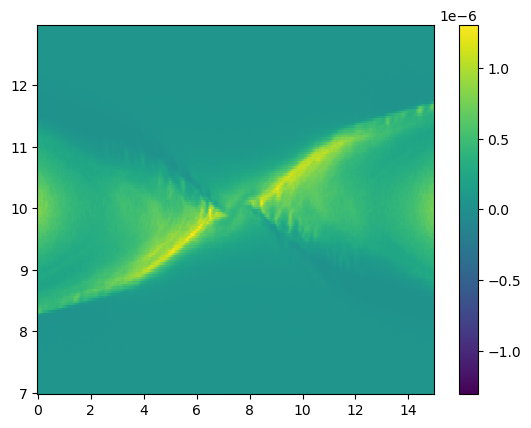

In [6]:
EFx = data['high_res_hbg']['Ppar']['e1']+data['high_res_hbg']['Ppar']['e2']
plt.pcolormesh(X, Y, EFx, cmap='viridis', vmax=EFx.max(), vmin=-EFx.max())
plt.colorbar()
plt.show()

In [25]:
experiment = 'high_res_2'
data, X, Y, qom, times = rp.get_exp_times([experiment], files_path, fields_to_read, 
                                          choose_species=['e','i'], verbose=False, 
                                          choose_times=range(5,8), indexing='ij',
                                          choose_x=[0,384], choose_y=[179,333],
                                           filters = None) 
import src.utilities as ut
ut.get_PS_2D(data, X[:,0], Y[0,:]) # indexing ij

INFO:src.read_pic: reading /volume1/scratch/share_dir/nn/data/raw_data//high_res_2/SimulationData.txt
INFO:src.read_pic:Lx = 30.0, Ly = 40.0, nxc = 768, nyc = 1024


In [26]:
import numpy as np
X.shape, Y.shape, 2*np.pi/(X[-1,0] - X[0,0]), X[-1,0] - X[0,0]

((384, 154), (384, 154), 0.419972699383283, 14.9609375)

Following definitions (1) Yang, Y.; Matthaeus, W. H.; Parashar, T. N.; Wu, P.; Wan, M.; Shi, Y.; Chen, S.; Roytershteyn, V.; Daughton, W. Energy Transfer Channels and Turbulence Cascade in Vlasov-Maxwell Turbulence. Phys. Rev. E 2017, 95 (6), 061201. https://doi.org/10.1103/PhysRevE.95.061201.

$
Q_\omega=\frac{1}{4} \omega^2 /\left\langle\omega^2\right\rangle
$



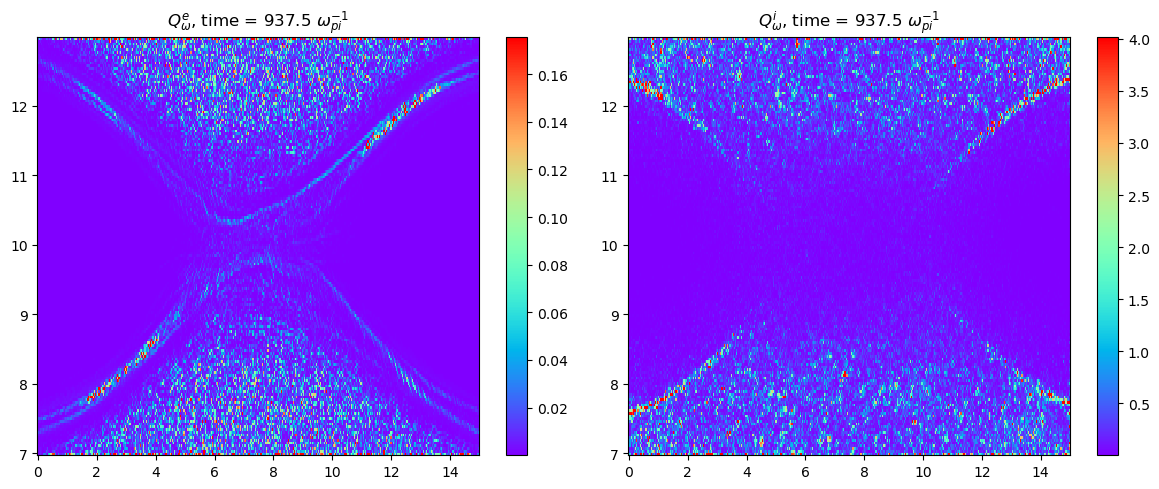

In [28]:
import numpy as np
fig, axes = plt.subplots(1, 2, figsize=(12, 5))
quantity = 'Qomega'
species_list = ['e', 'i']
i = 0
for idx, species in enumerate(species_list):
    QOI = data[experiment][quantity][species][...,i]/np.sqrt(np.mean(data[experiment][quantity][species][...,i]**2))
    vmin_gt = np.percentile(QOI, 0)
    vmax_gt = np.percentile(QOI, 99.5)
    axes[idx].pcolormesh(X, Y, QOI, cmap='rainbow', vmin=vmin_gt, vmax=vmax_gt)
    axes[idx].set_title(rf"$Q_\omega^{species}$"+f", time = {times[i]} "+r"$\omega_{pi}^{-1}$")
    fig.colorbar(axes[idx].collections[0], ax=axes[idx])

plt.tight_layout()
plt.show()


$D_{ij} = \frac{1}{2}\left(\partial_i u_j+\partial_j u_i\right)-\frac{1}{3} \theta \delta_{i j},\quad \theta = \nabla \cdot u$

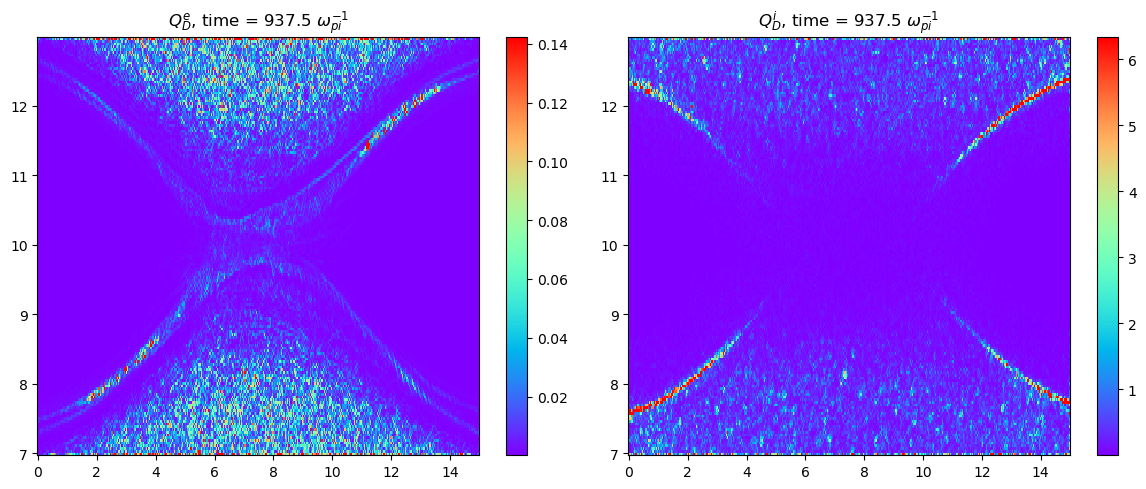

In [29]:
fig, axes = plt.subplots(1, 2, figsize=(12, 5))
quantity = 'QD'
species_list = ['e', 'i']
i = 0
for idx, species in enumerate(species_list):
    QOI = data[experiment][quantity][species][...,i]/np.sqrt(np.mean(data[experiment][quantity][species][...,i]**2))
    vmin_gt = np.percentile(QOI, 0)
    vmax_gt = np.percentile(QOI, 99.5)
    axes[idx].pcolormesh(X, Y, QOI, cmap='rainbow', vmin=vmin_gt, vmax=vmax_gt)
    axes[idx].set_title(rf"$Q_D^{species}$"+f", time = {times[i]} "+r"$\omega_{pi}^{-1}$")
    fig.colorbar(axes[idx].collections[0], ax=axes[idx])

plt.tight_layout()
plt.show()


$Pi—D = \Pi_{i j} D_{i j}\quad \Pi_{i j}=P_{i j}-p \delta_{i j}$

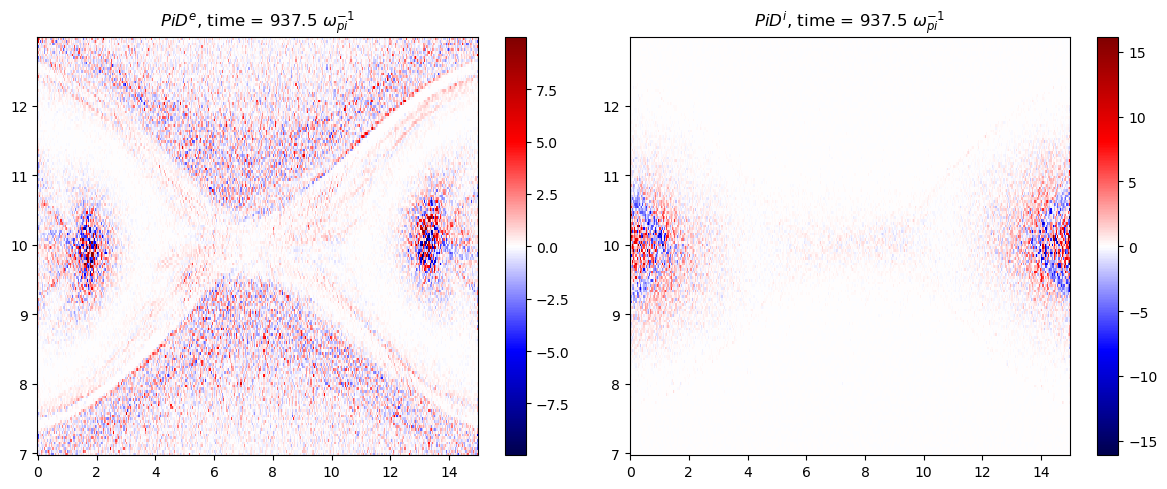

In [30]:
fig, axes = plt.subplots(1, 2, figsize=(12, 5))
quantity = 'PiD'
species_list = ['e', 'i']
i = 0
for idx, species in enumerate(species_list):
    QOI = data[experiment][quantity][species][...,i]/np.sqrt(np.mean(data[experiment][quantity][species][...,i]**2))
    vmin_gt = np.percentile(QOI, 0.01)
    vmax_gt = np.percentile(QOI, 100)
    axes[idx].pcolormesh(X, Y, QOI, cmap='seismic', vmin=vmin_gt, vmax=-vmin_gt)
    axes[idx].set_title(rf"${quantity}^{species}$"+f", time = {times[i]} "+r"$\omega_{pi}^{-1}$")
    fig.colorbar(axes[idx].collections[0], ax=axes[idx])

plt.tight_layout()
plt.show()


$Q_j=\frac{1}{4} \boldsymbol{j}^2 /\left\langle\boldsymbol{j}^2\right\rangle$

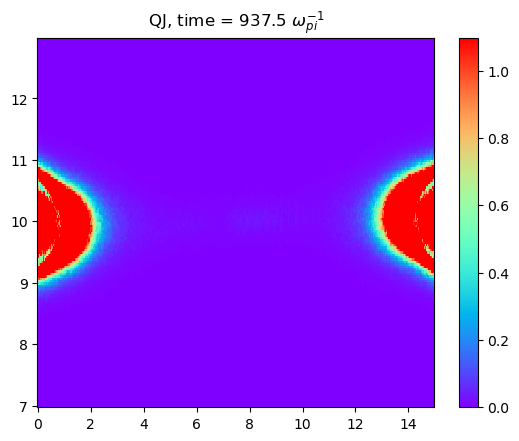

In [31]:
import numpy as  np
i = 0
quantity = 'QJ'
vmin_gt = np.percentile(data[experiment][quantity][...,i], 0)
vmax_gt = np.percentile(data[experiment][quantity][...,i], 95)

plt.pcolormesh(X, Y, data[experiment][quantity][...,i], cmap='rainbow', vmin=0, vmax=vmax_gt)
plt.colorbar()
plt.title(quantity+f", time = {times[i]} "+r"$\omega_{pi}^{-1}$")
plt.show()


In [32]:
import src.utilities as ut
ut.get_T(data[experiment],qom)

  data['T'][species]=(data['Pxx'][species]+\

  data['T_par'][species]=(data['Pxx'][species]*bx**2+\



INFO:matplotlib.mathtext:Substituting symbol \perp from STIXGeneral
INFO:matplotlib.mathtext:Substituting symbol \perp from STIXGeneral
INFO:matplotlib.mathtext:Substituting symbol \perp from STIXGeneral
INFO:matplotlib.mathtext:Substituting symbol \perp from STIXGeneral


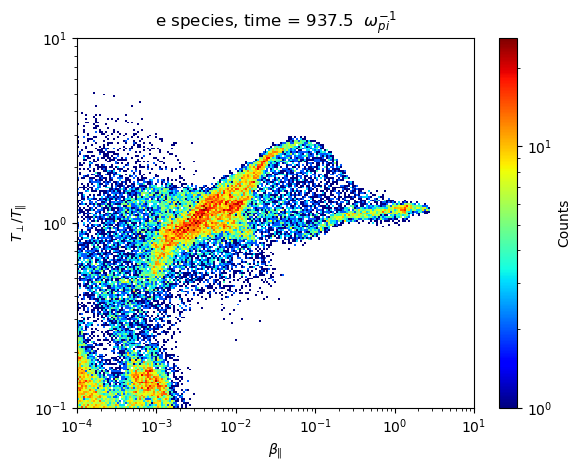

In [36]:
import matplotlib.colors as mcolors
species = 'e'
i = 0
x = data[experiment]['beta_par'][species][...,i].flatten()
y = data[experiment]['T_perp'][species][...,i].flatten()/data[experiment]['T_par'][species][...,i].flatten()
plt.hist2d(x, y, bins=[np.logspace(-4, 1, num=200),np.logspace(-1, 1, num=200)], cmap=plt.cm.jet, norm=mcolors.LogNorm())
plt.xscale('log')
plt.yscale('log')
#plt.xlim([1e-2, 1e4])
plt.ylim([1e-1, 1e1])
plt.colorbar(label='Counts')
plt.xlabel(r'$\beta_\|$')
plt.ylabel(r'$T_\perp/T_\|$')
plt.title(f'{species} species, time = {times[i]}  ' + r"$\omega_{pi}^{-1}$")
plt.show()

In [ ]:
experiment = 'data'
data, X, Y, qom, times = rp.get_exp_times([experiment], files_path, fields_to_read, 
                                          choose_species=['e','i'], verbose=False, 
                                          choose_times=range(26,28), indexing='ij',
                                           filters = None) 
data = data[experiment]
import src.utilities as ut
ut.get_PS_2D_field(data, X[:,0], Y[0,:]) # indexing ij
ut.get_Ohm(data, qom, X[:,0], Y[0,:])
ut.get_T(data,qom)

KeyError: 'Jx'

In [37]:
import matplotlib.colors as mcolors
import numpy as np
species = 'e'
i = 0
x = data['beta_par'][species][...,i].flatten()
y = data['T_perp'][species][...,i].flatten()/data['T_par'][species][...,i].flatten()
plt.hist2d(x, y, bins=[np.logspace(-3, 1, num=50),np.logspace(-1, 1, num=50)], cmap=plt.cm.jet, norm=mcolors.LogNorm())
plt.xscale('log')
plt.yscale('log')
plt.xlim([1e-2, 1e4])
plt.ylim([1e-1, 1e1])
plt.colorbar(label='Counts')
plt.xlabel(r'$\beta_\|$')
plt.ylabel(r'$T_\perp/T_\|$')
plt.title(f'{species} species, time = {times[i]}  ' + r"$\omega_{pi}^{-1}$")
plt.show()

KeyError: 'beta_par'